In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(1198, 60)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [14]:
regressor = Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(60,1)))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(Dense(units=1))

In [17]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

In [19]:
regressor.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)               

In [20]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 28s 23ms/step - loss: 0.0455
Epoch 2/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0060
Epoch 6/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 19s 15ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0046
Epoch 12/100
1198/1198 [============================

In [21]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [22]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs.shape

(80, 1)

In [23]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
predict_stock_price = regressor.predict(X_test)
predict_stock_price = scaler.inverse_transform(predict_stock_price)

In [25]:
predict_stock_price

array([[780.4882 ],
       [777.83813],
       [777.7932 ],
       [778.937  ],
       [782.07367],
       [787.73615],
       [793.1757 ],
       [795.74805],
       [796.36945],
       [796.1253 ],
       [795.68414],
       [795.2135 ],
       [794.89557],
       [795.31793],
       [796.2322 ],
       [800.54236],
       [807.15045],
       [814.4543 ],
       [818.7223 ],
       [815.29114]], dtype=float32)

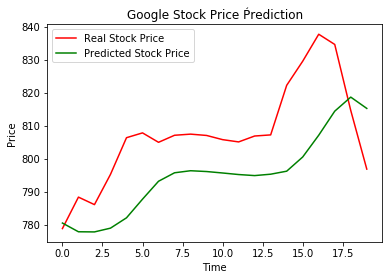

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predict_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google Stock Price Ṕrediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()